In [3]:
# Reference: https://colab.research.google.com/drive/1gZEbQ72RViC62TmZoaIwdDR3J6W8zK_e#scrollTo=7nrFZ5yc0QR1
!pip install vega_datasets

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

In [9]:
from vega_datasets import data
df = data.cars()
df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [10]:
mpg = df[['Miles_per_Gallon', 'Year']].groupby('Year').mean()
mpg.head()

,Miles_per_Gallon
Year,
1970-01-01,17.689655
1971-01-01,21.250000
1972-01-01,18.714286
1973-01-01,17.100000
1974-01-01,22.703704


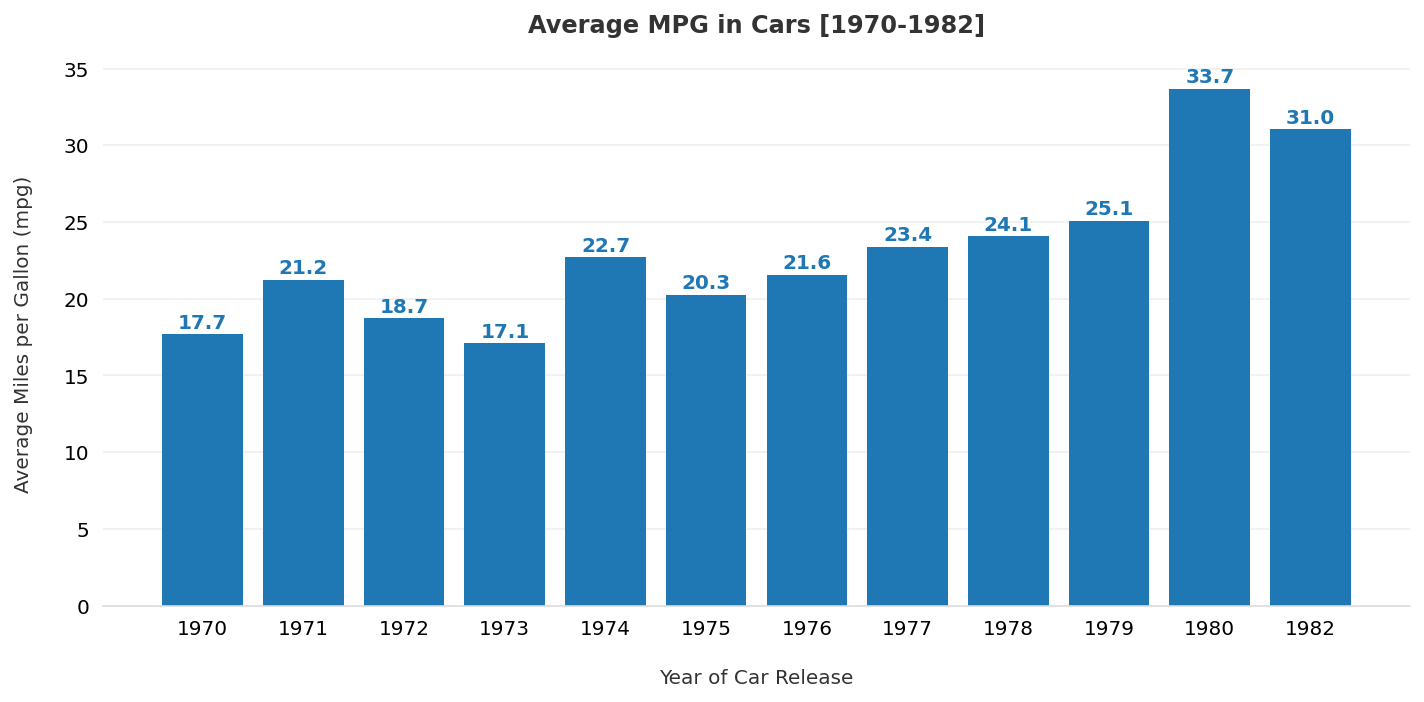

In [15]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (10, 5)

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=np.arange(mpg.size),
    height=mpg['Miles_per_Gallon'],
    tick_label=mpg.index.strftime('%Y')
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.4,
        round(bar.get_height(), 1),
        horizontalalignment='center',
        color=bar_color,
        weight='bold'
    )

# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Year of Car Release', labelpad=15, color='#333333')
ax.set_ylabel('Average Miles per Gallon (mpg)', labelpad=15, color='#333333')
ax.set_title('Average MPG in Cars [1970-1982]', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()